# Functions

Before functions you've been writing all your application within a single file, one line after another just as they would be executed. Now this will change, making maybe a bit harder to follow the flow of code, however in return we'll
get two things:

- template-ability,
- isolation.

For example, let's jump back to when we learned about dictionaries. At one point we were searching if a given country is within our capital dictionary:

In [1]:
capitals = {
    "Europe": {
        "UK": {
            "England": "London",
            "Northern Ireland": "Belfast",
            "Wales": "Cardiff",
            "Scotland": "Edinburgh",
        },
        "Hungary": "Budapest",
    },
    "North America": {"Canada": "Toronto", "USA": "Washington",},
    "Asia": {"Japan": "Tokyo", "Thailand": "Bangkok",},
}

The code went something like:

In [2]:
search_for = "Japan"
has_japan = False
for countries in capitals.values():
    if search_for in countries:
        has_japan = True
        print("found " + search_for)
if not has_japan:
    print("could not find " + search_for)

found Japan


What happened when we wanted to fine if Silky was within this dictionary? We pretty much copied and pasted the code
chaning the ``search_for`` variable:

In [3]:
search_for = "Silky"
has_japan = False
for countries in capitals.values():
    if search_for in countries:
        has_japan = True
        print("found " + search_for)
if not has_japan:
    print("could not find " + search_for)

could not find Silky


This is not a great strategy in general though, as now we have twice as many code to read when we want to find out what our applications does. And what happens if we want to find out for five elements if their within capitals? Do we copy the above code five times? It's not a scalable solution, instead we would like to just be able to parametrize the  code snippet, and call it with five different values:

In [4]:
def has_capital(search_for):
    has = False
    for countries in capitals.values():
        if search_for in countries:
            has = True
            print("found " + search_for)
    if not has:
        print("could not find " + search_for)

The function has:

- name (we'll refer by this calling it),
- parameters (input arguments),
- result (return value)

You can also think of functions as templates; the name is the template name, the template parameters are their input arguments, and the result is something that will be able to live after the template code instance ran. In the above example we don't have any result, so let's ignore that for now. The input/parameter argument is ``search_for``, while the name is ``has_capital``. To call the function we'll need to specify the name, and then specify its parameters within ``()`` brackets:

In [5]:
has_capital("Japan")
has_capital("Silky")
has_capital("UK")

found Japan
could not find Silky
found UK


Here we called it three times, and the above three lines plus the function definition is equivalent with:

In [6]:
search_for = "Japan"
has_japan = False
for countries in capitals.values():
    if search_for in countries:
        has_japan = True
        print("found " + search_for)
if not has_japan:
    print("could not find " + search_for)

search_for = "Silky"
has_japan = False
for countries in capitals.values():
    if search_for in countries:
        has_japan = True
        print("found " + search_for)
if not has_japan:
    print("could not find " + search_for)

search_for = "UK"
has_japan = False
for countries in capitals.values():
    if search_for in countries:
        has_japan = True
        print("found " + search_for)
if not has_japan:
    print("could not find " + search_for)    

found Japan
could not find Silky
found UK


# calling functions from functions

Whenever a function is called, the code execution at the call line is suspended, and it jumps to within the function body (the part after the ``def has_capital(search_for):``) and we execute line by line the functions body. When the function body finishes, the execution goes back to where we called the function from.

In [7]:
def has_capital(search_for):
    has = False
    for countries in capitals.values():
        if search_for in countries:
            has = True
            print("found " + search_for)
    if not has:
        print("could not find " + search_for)

has_capital("Japan")
has_capital("Silky")
has_capital("UK")

found Japan
could not find Silky
found UK


In the above example we first execute line 1 (``def has_capital(search_for):``) however this does not run that function. It simply declare the function, registers within the application that by the way there's a function called ``has_capital`` that takes one argument (parameter) that will be referred within the function as ``search_for``. Then the next execution line will be after the function body, which is ``has_capital("Japan")``. This line though calls the function, suspending the execution of that line, and jumps into the body of ``has_capital`` where the ``search_for`` variable name will contain the value of ``"Japan"``. Once the function finishes (after the for loop goes through all values of capitals, and the final if statement checks that we did find Japan, the control jumps back to the line of ``has_capital("Japan")``, and at that point having executed that function, continues on to the next line ``has_capital("Silky")``; which start all over the suspend, jump into function, finish function, return control flow to the call site. Similarly with ``has_capital("UK")`` after which we have no more lines to run, so the application finishes. 

Here's another demonstration of this, where functions pass there and back their execution flow, in a ping-pong fashion:

In [8]:
def ping(count):
    print("start ping " + str(count))
    if count > 0:
        count = count - 1
        pong(count)
    print("end ping " + str(count))

def pong(count):
    print("start pong " + str(count))
    if count > 0:
        count = count - 1
        ping(count)
    print("end pong " + str(count))

print('before ping(2) call')
ping(2)
print('after ping(2) call')

before ping(2) call
start ping 2
start pong 1
start ping 0
end ping 0
end pong 0
end ping 1
after ping(2) call


The two functions call each other up to the parameter count, in the following fashion:

1. on line ``def ping(count):`` gets executed that defines the function ``ping`` taking a ``count`` parameter; the body is ignored for now, that will be only executed once you call the function (template),
2. on line ``def poing(count):`` gets executed that defines the function ``pong`` taking a ``count`` parameter
3. ``print('before ping(2) call')`` just prints out some text to the screen,
4. then line ``ping(2)`` executes, which says call the function ``ping`` where the ``count`` is the number 2; this suspends the code execution at this call, and starts running the body of ``ping`` (we'll return here after that body execution finishes).
5. ping first prints a message to the screen via ``print("start ping " + str(count))``
6. ping now checks if the count variable is greater than 0 (it is as we just passed in the value 2), and because it is , decreases it and calls the ``pong`` function with the new count value of ``1``. Again at this point this ping function body execution is suspended, and execution will not continue until the called functions body (``pong``) finishes running.
7. ``pong`` now does all the same... and so they ping-pong back to each other until the count is decreased down to the value of 0. At this point they stop calling the other, the final ping/pong body finishes by executing its ``print('after...)`` code, and flow returns back to the callers body. As you can see now the code parts following the function calls execute in reverse order (note the output).

# returning values from functions

While functions are great to parametrize code, all variables defined within the function live only within the body of the function, they are not visible from the outside:

In [9]:
def best_dog_breed():
    breed = "Yorkie"
    print("The best dog bread is " + breed)

In [10]:
best_dog_breed()

The best dog bread is Yorkie


In [11]:
breed

NameError: name 'breed' is not defined

As the above demonstrates the breed variable defined within the function is not visible from outside that function. The function traps it within. Not allowing us to do reuse that after the call, as in:

In [12]:
best_breed = best_dog_breed()
print("I love " + str(best_breed))

The best dog bread is Yorkie
I love None


The way we can allow local variables to escape from functions is by ``return``-ing them. 
All functions in Python by default (that is if there's no ``return`` line executed within their body) return the value ``None``. This is just a placeholder for no value. This is why the above code printed ``I love None``. We need to fix our function to return the bread to allow the above code to work as expected:

In [13]:
def best_dog_breed_with_return():
    breed = "Yorkie"
    print("The best dog breed is " + breed)
    return breed

best_breed = best_dog_breed_with_return()
print("I love " + str(best_breed))

The best dog breed is Yorkie
I love Yorkie


If a function returns a value you can save the return value at the call location by using the variable definition
form of `` name = ...`` as the above code demonstrates.

# Multiple return values

In Python we can return multiple elements from within the function, by just enumerating them with the ``,``. Similarly you can save at the function call location those values into new variables via the ``,`` enumeration on the left side
of the ``=``.

In [14]:
def great_names():
    dog = "Silky"
    human = ["Lisa", "Bernat"]
    return dog, human

In [15]:
great_dog_name, great_human_names = great_names()
print(great_dog_name)
print(great_human_names)

Silky
['Lisa', 'Bernat']


# Global and function scopes

Defining variables in Python are always bound to a scope. Think of scopes as a dictionary where we store what variables and function we have defined. The keys are the variable/function **names**, while the values will be the content of the variables, or the functions. 

Though in the future we'll learn about other scopes too, for now we've ran into two of these:
- global scope,
- function scopes.

Given a python file, all variables defined **not within a function** is defined within the **global scope** (dictionary). Such variables can be therefore accessed from anywhere within the file, even from within functions. For example: 

In [16]:
from lolviz import callsviz
from IPython.display import display

['Yorkie', 'Pug']
no it is not


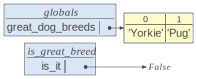

In [17]:
great_dog_breeds = ["Yorkie", "Pug"]

def is_great_breed(name):
    is_it = name in great_dog_breeds
    if is_it is True:
        print("yes it is")
    else:
        print("no it is not")
    display(callsviz(varnames=('great_dog_breeds', 'is_great_breed', 'is_it')))

print(great_dog_breeds)
is_great_breed("Beagle")

In the above code, the variable ``great_dog_breeds`` is defined within the global scope, and as such available within all functions defined within the same file. This allows us to use it within both the function and outside of it, as the example above shows. If however the great_dog_breeds would be defined within the function, we'd need to return it to be able to achieve the same:

no it is not


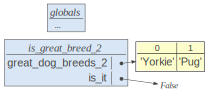

NameError: name 'great_dog_breeds_2' is not defined

In [18]:
def is_great_breed_2(name):
    great_dog_breeds_2 = ["Yorkie", "Pug"]
    is_it = name in great_dog_breeds
    if is_it is True:
        print("yes it is")
    else:
        print("no it is not")
    display(callsviz(varnames=('is_great_breed_2', 'great_dog_breeds_2', 'is_it')))

is_great_breed_2("Beagle")
print(great_dog_breeds_2)

When python throws an error that ``great_dog_breeds_2`` is not defined, what it means is that look I've checked the *globals scope* and there was no variable in there with that name.

Now compare it to the code below, here the line ``great_dog_breeds_3 = is_great_breed_3("Beagle")`` is not within a function, so the operation creates the ``great_dog_breeds_3`` within the global scope, and is the reason why ``print(great_dog_breeds_3)`` can succeed, the lookup of name ``great_dog_breeds_3`` now succeeds within the global scope (which is just another dictionary). Let's look at the global scope before the ``is_great_breed_3`` finishes and after:

no it is not


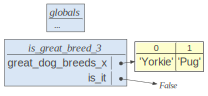

['Yorkie', 'Pug']


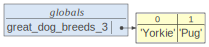

In [19]:
def is_great_breed_3(name):
    great_dog_breeds_x = ["Yorkie", "Pug"]
    is_it = name in great_dog_breeds_x
    if is_it is True:
        print("yes it is")
    else:
        print("no it is not")
    display(callsviz(varnames=('great_dog_breeds_3', 'great_dog_breeds_x', 'is_it')))
    return great_dog_breeds_x



great_dog_breeds_3 = is_great_breed_3("Beagle")
print(great_dog_breeds_3)
display(callsviz(varnames=('great_dog_breeds_3', 'great_dog_breeds_x', 'is_it')))


As you can see before the ``is_great_breed_3`` finishes, the globals namespace does not contain any variables. However, once it finishes we do define ``great_dog_breeds_3``.

The global scope persist through the entire life of the application. So setting something within the global scope keeps it around until you exit that program, however function scopes are cleaned up as soon as functions finish running. This is why we need to return values from them if we want to keep using them. Upon return by using the `` x = call()`` notation we define the variable within the callers scope:
- if we've been within a function, now will be accessible within the function,
- if we've been in the global scope (not within a function), now will be accessible within the global scope.

Every run of a function creates a new scope for that function (as such we cannot see/refer to variables defined through an earlier run of the function):

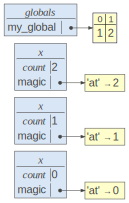

In [20]:
def x(count):
    count -= 1
    magic = {'at': count}
    if count > 0:
        x(count)
    else:
        display(callsviz(varnames=('count', 'magic', 'my_global')))
my_global = [1, 2]
x(3)

In the above example we call x three times, and as such we have three different scopes for ``x``, with its own count and magic variables, all of them having different values. This also demonstrates that all function parameters/arguments are automatically added to the function scope (see all the ``count`` entries, we never defined these, yet they are still there; these are rendered in italic to indicate this).

Every function has it's own scope (if we have function a and b, they cannot see each other variables):

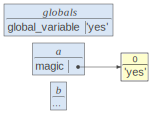

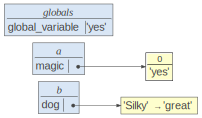

In [21]:
def a():
    magic = ['yes']
    b()

def b():
    display(callsviz(varnames=('magic', 'dog', 'global_variable')))
    dog = {'Silky': 'great'}
    display(callsviz(varnames=('magic', 'dog', 'global_variable')))

    
global_variable = 'yes'
a()

Note in the above that the scope dictionary is populated as we go, hence why in the above b scope first is empty, but once ``dog = {'Silky': 'great'}`` runs now you see the ``dog`` variable.


**Advanced** 

If there's a function within a function, the child function can refer to variables within its parents scope. In this case the child accesses the parent variable directly, as shown by the arrow referencing to the same value for both ``a``:

[1, 2]
{'child': 'yes'}
{'global': 'yeah'}


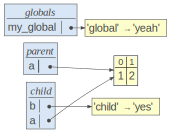

In [22]:
def parent():
    a = [1, 2]
    def child():
        b = {'child': 'yes'}
        print(a)
        print(b)
        print(my_global)
        display(callsviz(varnames=('a', 'b', 'my_global')))
    
    child()
my_global = {'global': 'yeah'}
parent()